In [1]:
import numpy as np
import pandas as pd
from scipy.stats import wilcoxon
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'axes.facecolor':'white', 
            'figure.facecolor':'white', 
            'axes.edgecolor':'black', 
            'grid.color': 'black', 
            'axes.grid': False
            }, 
        
        style='ticks',
        font_scale=2
        )

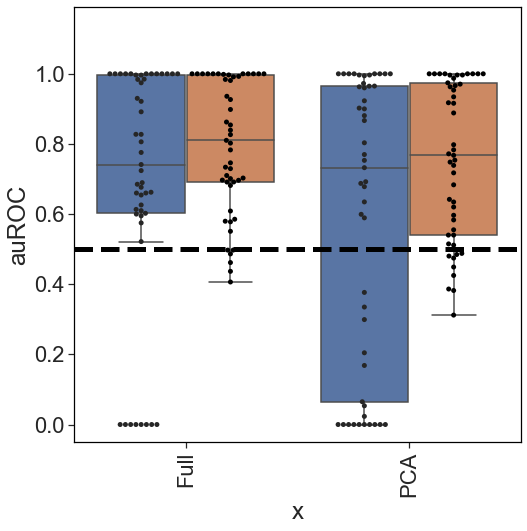

In [2]:

oprt = pd.read_csv('results/ucirvine_long_dataset_lits.csv')
oprt['Method'] = oprt['cv']

oprt['hue'] = oprt.Method.str.split(' ').str[0]
oprt['x'] = oprt.Method.str.replace('CV', ' Full').str.split(' ').str[-1].astype(str)


plt.figure(figsize=(8,8))
ax=sns.boxplot(#x='Class balance', 
            y='auROC', 
               x='x', 
               hue='hue',
               order=['Full', 'PCA'],
            data=oprt, 
            fliersize=0
            )
handles, labels = ax.get_legend_handles_labels()

sns.swarmplot(#x='Class balance', 
            y='auROC', 
               x='x', 
               hue='hue',
               order=['Full', 'PCA'],
            data=oprt, 
            s=5, 
              color='black', 
              dodge=True,
            ax=ax
            )

plt.plot([-.5, 8.5], [.5, .5], '--',
             linewidth = 5, 
             color='black'
             )
plt.legend().remove()

# plt.title('Honest LOOCV can suffer from distributional bias\nin uci benchmarks')
plt.xticks(rotation=90)
plt.ylim(-0.05, 1.19)
plt.savefig('../plots-latest/uci-classification-longer-dataset-list.pdf', 
            format='pdf', 
            bbox_inches='tight', 
            dpi=900)

plt.show()

In [3]:
oprt.groupby('Method').auROC.describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Method,,,,,,,,
LOOCV,49.0,0.69,0.34,0.00,0.60,0.74,1.00,1.0
LOOCV PCA,49.0,0.59,0.41,0.00,0.06,0.73,0.97,1.0
RLOOCV,49.0,0.79,0.19,0.41,0.69,0.81,1.00,1.0
RLOOCV PCA,49.0,0.75,0.22,0.31,0.54,0.77,0.97,1.0


In [4]:
wilcoxon(
         oprt.loc[oprt.cv=='LOOCV'].auROC, 
         oprt.loc[oprt.cv=='RLOOCV'].auROC, 
        alternative='two-sided'
            )


WilcoxonResult(statistic=87.0, pvalue=3.930913490287581e-05)

In [5]:
wilcoxon(
         oprt.loc[oprt.cv=='LOOCV PCA'].auROC, 
         oprt.loc[oprt.cv=='RLOOCV PCA'].auROC, 
    alternative='two-sided'
            )

WilcoxonResult(statistic=10.0, pvalue=1.7122466872452476e-07)

In [6]:
( oprt.loc[oprt.Method=='RLOOCV PCA'].auROC.values > \
        oprt.loc[oprt.Method=='RLOOCV'].auROC.values ).sum()

16

In [7]:
( oprt.loc[oprt.Method=='LOOCV PCA'].auROC.values > \
        oprt.loc[oprt.Method=='LOOCV'].auROC.values ).sum()

11

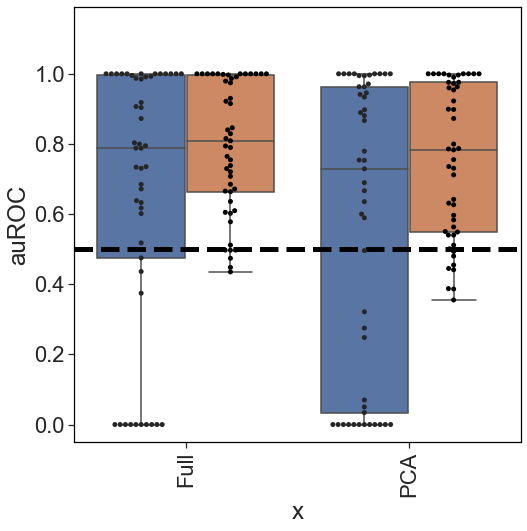

In [8]:
oprt = pd.read_csv('results/hloocv_ucirvine_classif_results_all.csv')
oprt['Method'] = oprt['cv']

oprt['hue'] = oprt.Method.str.split(' ').str[0]
oprt['x'] = oprt.Method.str.replace('CV', ' Full').str.split(' ').str[-1].astype(str)


plt.figure(figsize=(8,8))
ax=sns.boxplot(#x='Class balance', 
            y='auROC', 
               x='x', 
               hue='hue',
               order=['Full', 'PCA'],
            data=oprt, 
            fliersize=0
            )
handles, labels = ax.get_legend_handles_labels()

sns.swarmplot(#x='Class balance', 
            y='auROC', 
               x='x', 
               hue='hue',
               order=['Full', 'PCA'],
            data=oprt, 
            s=5, 
              color='black', 
              dodge=True,
            ax=ax
            )

plt.plot([-.5, 8.5], [.5, .5], '--',
             linewidth = 5, 
             color='black'
             )
plt.legend().remove()

# plt.title('Honest LOOCV can suffer from distributional bias\nin uci benchmarks')
plt.xticks(rotation=90)
plt.ylim(-0.05, 1.19)
plt.savefig('../plots-latest/uci-hloocv-classification-longer-dataset-list.pdf', 
            format='pdf', 
            bbox_inches='tight', 
            dpi=900)

plt.show()

In [9]:
wilcoxon(
         oprt.loc[oprt.cv=='LOOCV'].auROC, 
         oprt.loc[oprt.cv=='RLOOCV'].auROC, 
        alternative='two-sided'
            )


WilcoxonResult(statistic=63.5, pvalue=1.3929222138293921e-05)

In [10]:
wilcoxon(
         oprt.loc[oprt.cv=='LOOCV PCA'].auROC, 
         oprt.loc[oprt.cv=='RLOOCV PCA'].auROC, 
    alternative='two-sided'
            )

WilcoxonResult(statistic=14.0, pvalue=1.0214052734998147e-07)

In [11]:
oprt.groupby('Method').auROC.describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Method,,,,,,,,
LOOCV,49.0,0.66,0.38,0.00,0.48,0.79,1.00,1.0
LOOCV PCA,49.0,0.57,0.42,0.00,0.03,0.73,0.96,1.0
RLOOCV,49.0,0.79,0.19,0.44,0.66,0.81,1.00,1.0
RLOOCV PCA,49.0,0.75,0.22,0.36,0.55,0.78,0.98,1.0


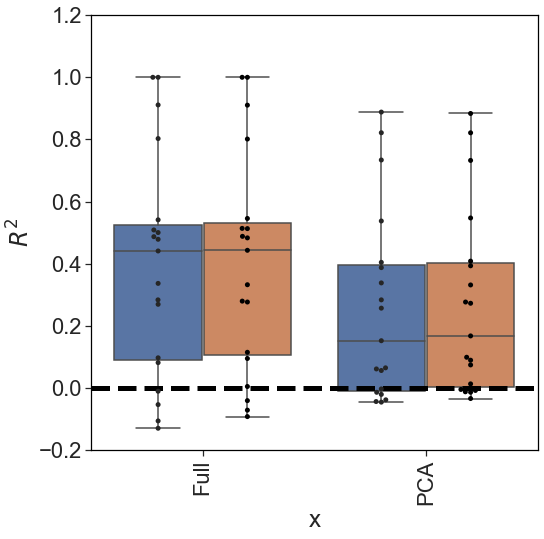

In [12]:

oprt = pd.read_csv('results/uci-regression-run.csv')

oprt['hue'] = oprt.Method.str.split(' ').str[0]
oprt['x'] = oprt.Method.str.replace('CV', ' Full').str.split(' ').str[-1].astype(str)

#                x='x', 
#                hue='hue',
#                order=['PCA', 'Full'],
oprt = oprt.groupby(list(oprt.columns[-4:]) )['$R^2$'].mean().reset_index()

plt.figure(figsize=(8,8))
ax=sns.boxplot(y='$R^2$', 
               x='x', 
               hue='hue',
               order=['Full', 'PCA'],
               data=oprt, 
               fliersize=0
               )
handles, labels = ax.get_legend_handles_labels()

sns.swarmplot(#x='Class balance', 
            y='$R^2$', 
            x='x', 
            hue='hue',
            data=oprt, 
            order=['Full', 'PCA'],
            s=5, 
              color='black', 
              dodge=True,
            ax=ax
            )

plt.plot([-.5, 8.5], [0,0], '--',
             linewidth = 5, 
             color='black'
             )

# plt.title('Honest LOOCV can suffer from distributional bias\nin uci benchmarks')
plt.xticks(rotation=90) 
plt.ylim(-0.2, 1.2)
plt.legend().remove()


plt.savefig('../plots-latest/uci-regression-longer-dataset-list.pdf', 
            format='pdf', 
            bbox_inches='tight', 
            dpi=900)

plt.show()

In [13]:
wilcoxon( ## without 'possible no switch' adjustment'
         oprt.loc[oprt.Method=='LOOCV']['$R^2$'], 
         oprt.loc[oprt.Method=='RLOOCV']['$R^2$'], 
         alternative='two-sided'
            )


WilcoxonResult(statistic=26.0, pvalue=0.003917694091796875)

In [14]:
wilcoxon( ## without 'possible no switch' adjustment'
         oprt.loc[oprt.Method=='LOOCV --> PCA']['$R^2$'], 
         oprt.loc[oprt.Method=='RLOOCV --> PCA']['$R^2$'],
         alternative='two-sided'
            )

WilcoxonResult(statistic=23.0, pvalue=0.002399444580078125)

In [15]:
oprt.groupby('Method')['$R^2$'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Method,,,,,,,,
LOOCV,19.0,0.39,0.36,-0.13,0.09,0.44,0.52,1.00
LOOCV --> PCA,19.0,0.25,0.31,-0.05,-0.01,0.15,0.40,0.89
RLOOCV,19.0,0.40,0.35,-0.09,0.10,0.44,0.53,1.00
RLOOCV --> PCA,19.0,0.27,0.30,-0.03,0.00,0.17,0.40,0.88


In [16]:
oprt.groupby('Method')['$R^2$'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Method,,,,,,,,
LOOCV,19.0,0.39,0.36,-0.13,0.09,0.44,0.52,1.00
LOOCV --> PCA,19.0,0.25,0.31,-0.05,-0.01,0.15,0.40,0.89
RLOOCV,19.0,0.40,0.35,-0.09,0.10,0.44,0.53,1.00
RLOOCV --> PCA,19.0,0.27,0.30,-0.03,0.00,0.17,0.40,0.88
